In [14]:
from matplotlib.pyplot import subplots
import numpy as np
import pandas as pd

In [15]:
from lifelines import \
(KaplanMeierFitter,
CoxPHFitter)
from lifelines.statistics import \
(logrank_test,
multivariate_logrank_test)
from datasets import load_dataset

In [17]:
import os
print(os.getcwd())

c:\Users\LE NGUYEN DUY PHUC\Documents\DeepHit


In [20]:
GPU = pd.read_csv('./sample data/GPU/gpu_data.csv')
GPU.columns

Index(['Unnamed: 0', 'time', 'censor1', 'censor2', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'z.idx1',
       'z.idx2'],
      dtype='object')

<Axes: xlabel='timeline'>

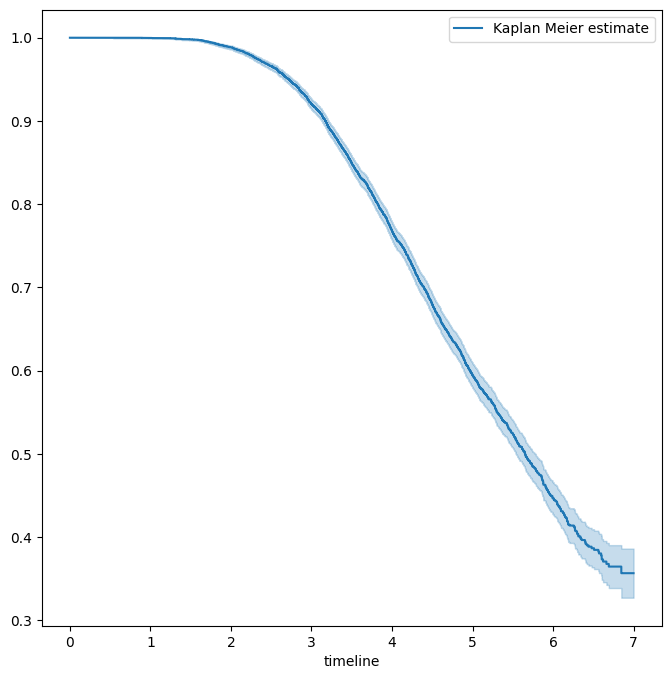

In [21]:
fig, ax = subplots(figsize=(8,8))
km = KaplanMeierFitter()
km_brain = km.fit(GPU['time'], GPU['censor1'])
km_brain.plot(label='Kaplan Meier estimate', ax=ax)

<Axes: xlabel='timeline'>

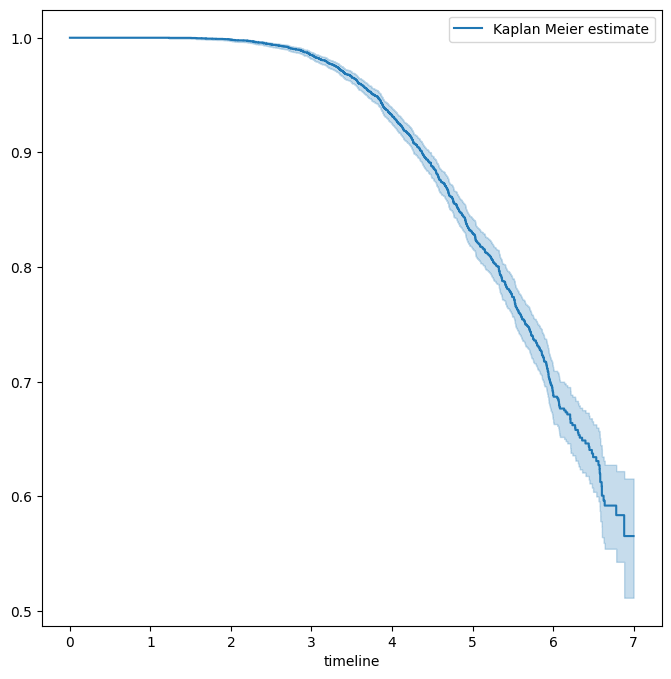

In [22]:
fig, ax = subplots(figsize=(8,8))
km = KaplanMeierFitter()
km_brain = km.fit(GPU['time'], GPU['censor2'])
km_brain.plot(label='Kaplan Meier estimate', ax=ax)

In [36]:
GPU['censor1'].value_counts(), GPU['censor2'].value_counts()

(censor1
 0    7567
 1    2433
 Name: count, dtype: int64,
 censor2
 0    9143
 1     857
 Name: count, dtype: int64)

In [45]:
GPU['censor'] = (GPU['censor1'] | GPU['censor2']).astype(int)
GPU['censor'] .value_counts()

censor
0    6710
1    3290
Name: count, dtype: int64

<Axes: xlabel='timeline'>

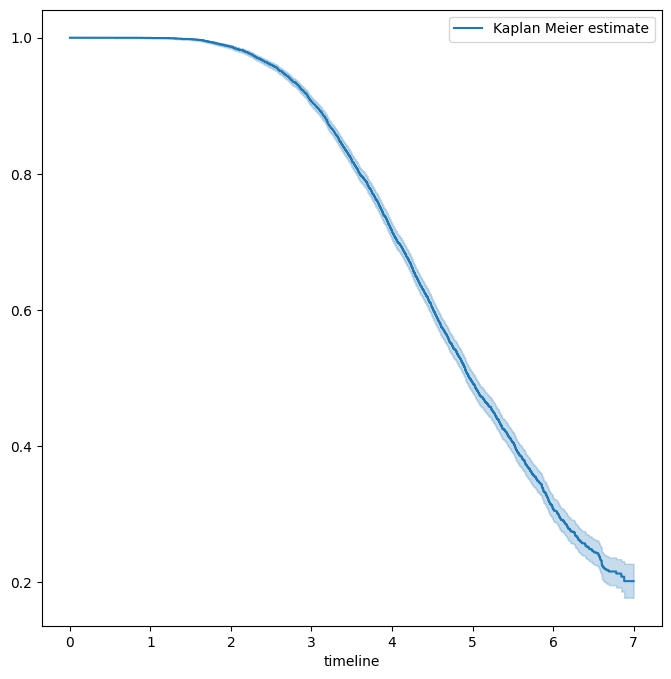

In [46]:
fig, ax = subplots(figsize=(8,8))
km = KaplanMeierFitter()
km_brain = km.fit(GPU['time'], GPU['censor'])
km_brain.plot(label='Kaplan Meier estimate', ax=ax)

In [32]:
GPU['V4'].value_counts(), GPU['V5'].value_counts(), GPU['V6'].value_counts(), GPU['V7'].value_counts(), GPU['V8'].value_counts(), GPU['V9'].value_counts(), GPU['V10'].value_counts(), GPU['V11'].value_counts(), GPU['V12'].value_counts(), GPU['V13'].value_counts(), GPU['V14'].value_counts()

(V4
 0    6697
 1    3303
 Name: count, dtype: int64,
 V5
 0    6599
 1    3401
 Name: count, dtype: int64,
 V6
 0    7541
 1    2459
 Name: count, dtype: int64,
 V7
 0    7561
 1    2439
 Name: count, dtype: int64,
 V8
 0    7486
 1    2514
 Name: count, dtype: int64,
 V9
 0    8792
 1    1208
 Name: count, dtype: int64,
 V10
 0    8765
 1    1235
 Name: count, dtype: int64,
 V11
 0    8698
 1    1302
 Name: count, dtype: int64,
 V12
 0    8772
 1    1228
 Name: count, dtype: int64,
 V13
 0    8799
 1    1201
 Name: count, dtype: int64,
 V14
 0    8753
 1    1247
 Name: count, dtype: int64)

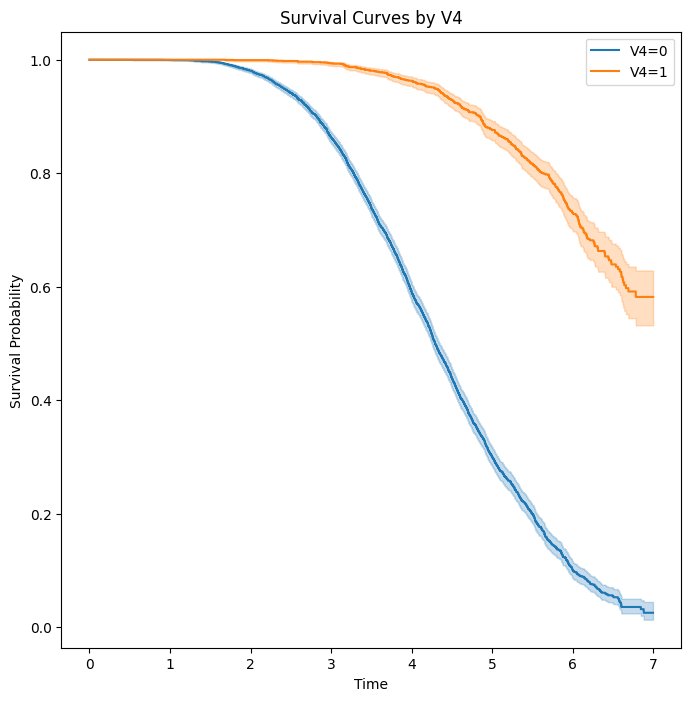

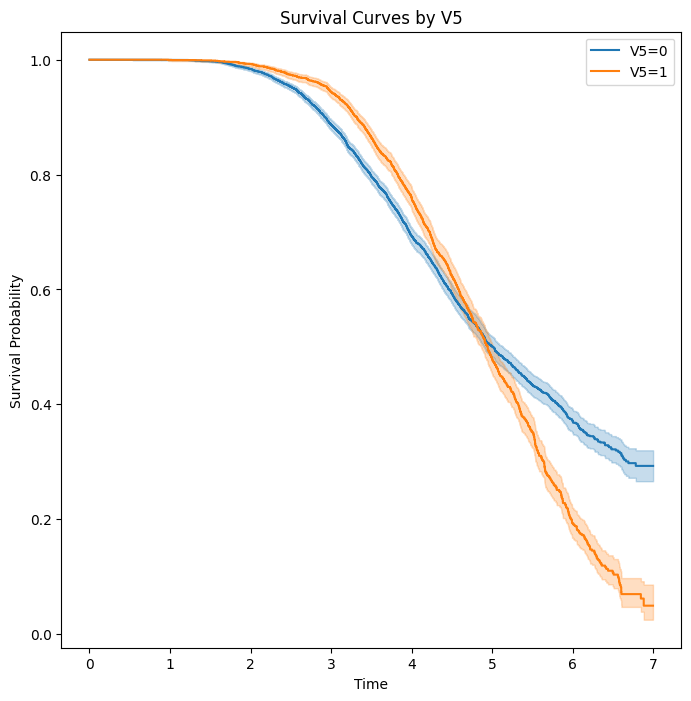

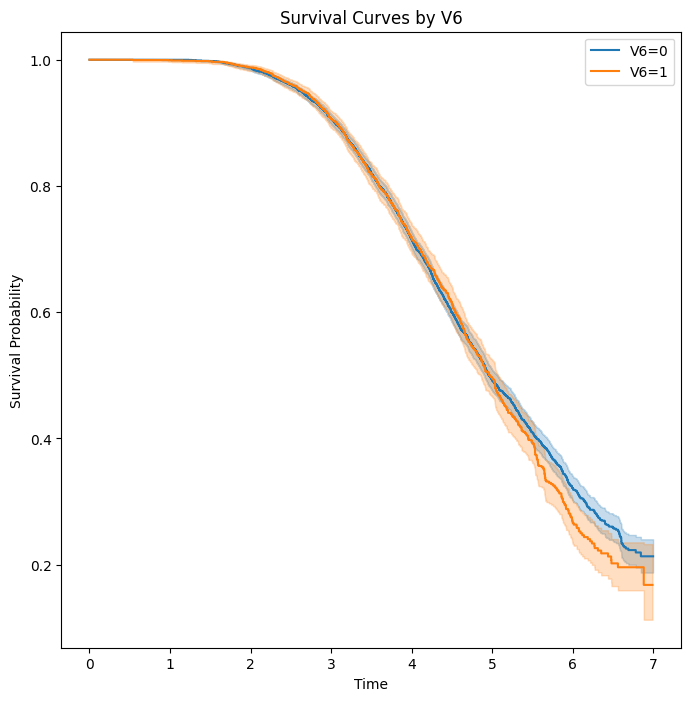

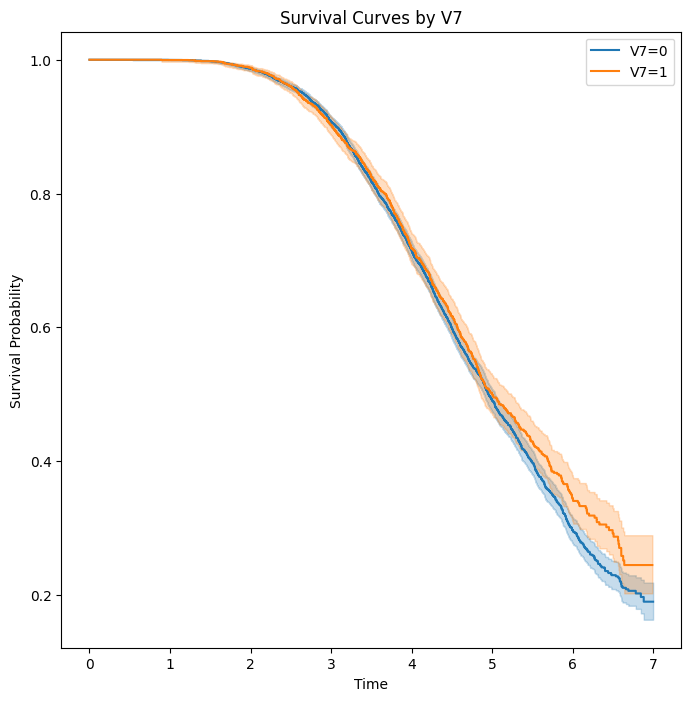

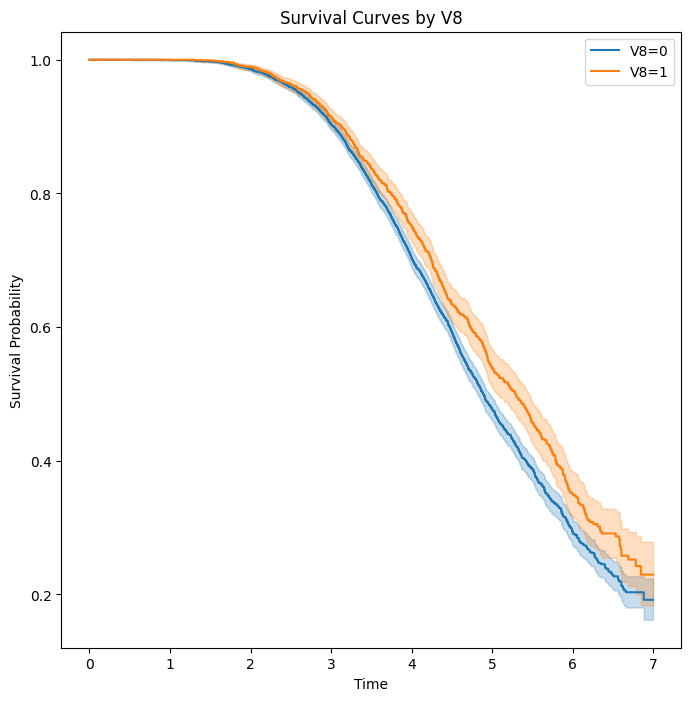

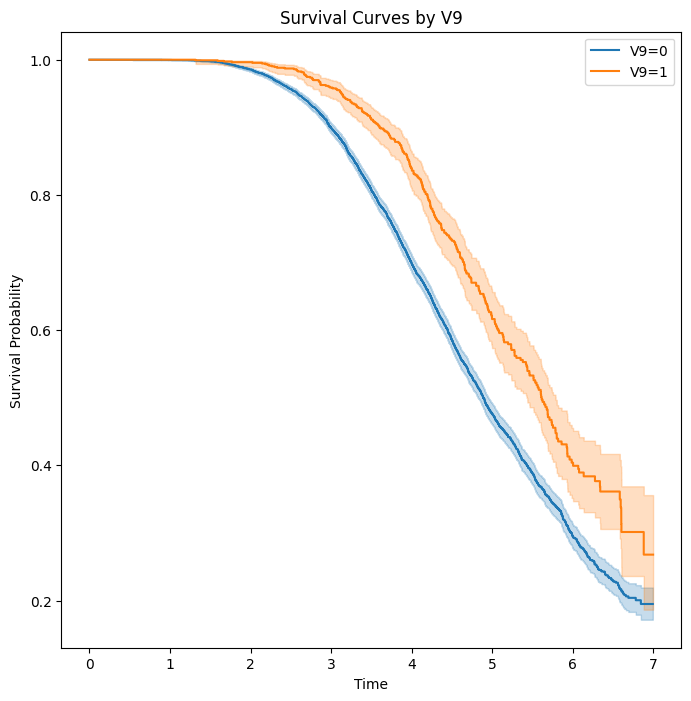

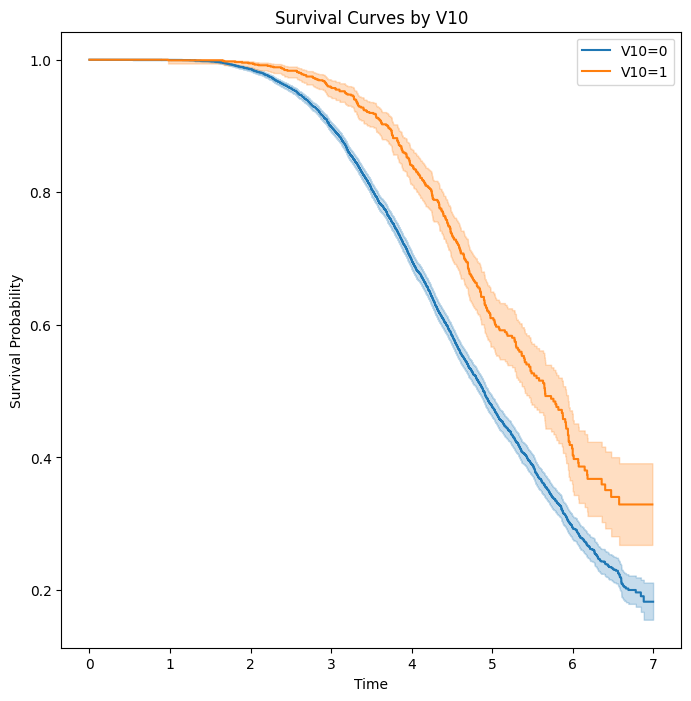

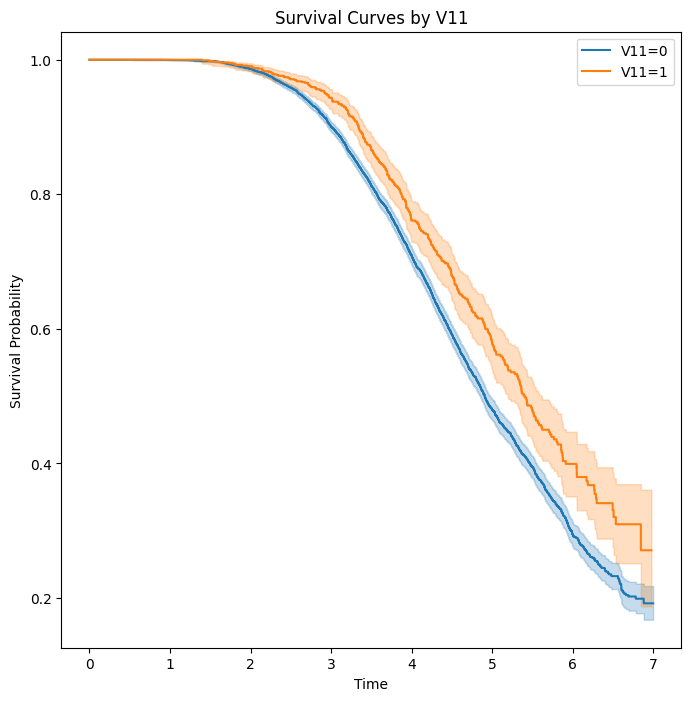

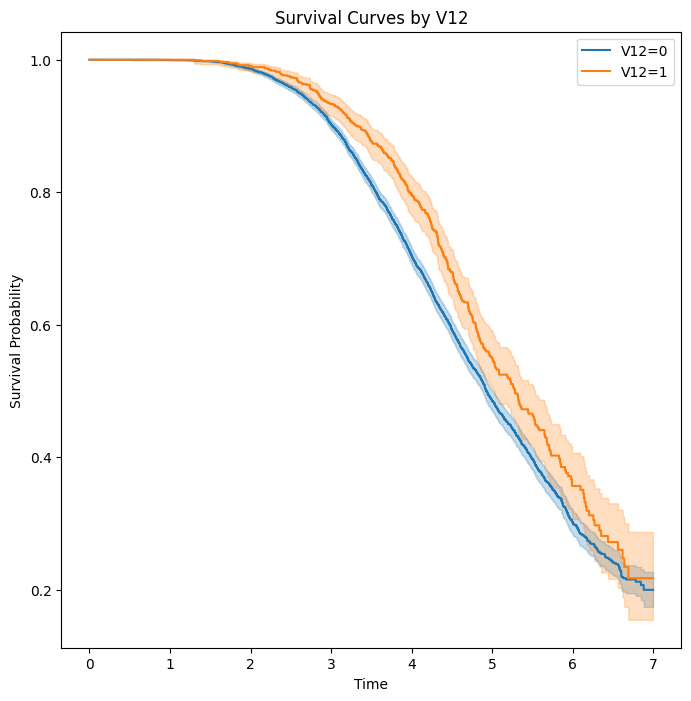

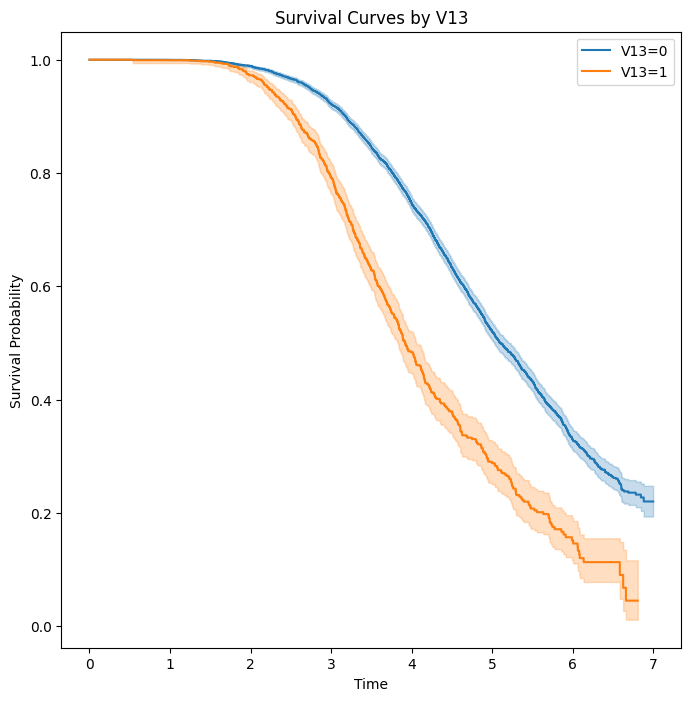

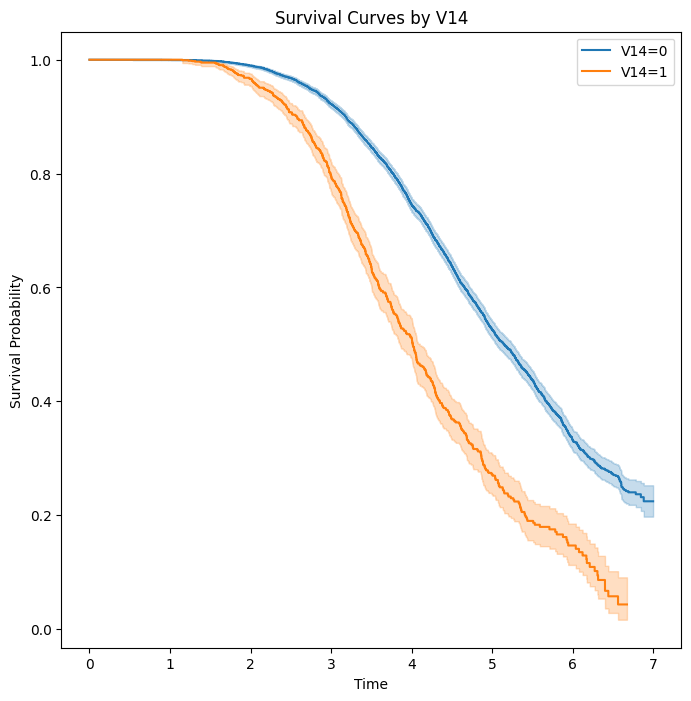

In [49]:
# Loop through features V4 to V14
by_v = {}
for i in range(4, 15):
    feature = f'V{i}'
    
    # Create a new figure for each feature
    fig, ax = subplots(figsize=(8,8))
    
    # Group by the current feature
    for value, df in GPU.groupby(feature):
        by_v[feature] = df
        km.fit(df['time'], df['censor'])
        km.plot(label=f'{feature}={value}', ax=ax)
    
    # Add title and labels
    ax.set_title(f'Survival Curves by {feature}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Survival Probability')
    ax.legend()

In [52]:
by_v

{'V4':       Unnamed: 0      time  censor1  censor2  V4  V5  V6  V7  V8  V9  V10  \
 3              4  3.744836        0        0   1   0   0   0   1   0    0   
 11            12  2.768276        0        0   1   0   1   0   0   0    0   
 14            15  3.784710        0        0   1   0   1   0   0   1    0   
 29            30  2.149220        0        0   1   0   1   0   0   0    1   
 34            35  2.094075        0        0   1   0   0   1   0   0    0   
 ...          ...       ...      ...      ...  ..  ..  ..  ..  ..  ..  ...   
 9980        9981  1.695299        0        0   1   0   1   0   0   0    0   
 9984        9985  3.388745        0        0   1   0   0   0   0   0    0   
 9989        9990  4.702875        0        0   1   0   1   0   0   0    0   
 9996        9997  2.997215        0        0   1   0   0   0   1   0    0   
 9998        9999  6.460245        0        0   1   0   0   1   0   0    1   
 
       V11  V12  V13  V14  V15  z.idx1  z.idx2  censor  

In [56]:
# First, create the by_v dictionary correctly
by_v = {}
for i in range(4, 15):
    feature = f'V{i}'
    by_v[i] = {
        '0': GPU[GPU[feature] == 0],
        '1': GPU[GPU[feature] == 1]
    }

# Now run the logrank tests
for i in range(4, 15):
    results = logrank_test(by_v[i]['0']['time'], 
                          by_v[i]['1']['time'],
                          by_v[i]['0']['censor'],
                          by_v[i]['1']['censor'])
    print(f"Logrank test for V{i}:")
    print(results.summary)

Logrank test for V4:
   test_statistic    p  -log2(p)
0     1861.217892  0.0       inf
Logrank test for V5:
   test_statistic         p  -log2(p)
0        8.719813  0.003148  8.311485
Logrank test for V6:
   test_statistic         p  -log2(p)
0        1.157321  0.282022  1.826121
Logrank test for V7:
   test_statistic         p  -log2(p)
0        3.253252  0.071282   3.81032
Logrank test for V8:
   test_statistic         p   -log2(p)
0       17.927095  0.000023  15.410957
Logrank test for V9:
   test_statistic             p   -log2(p)
0       59.284462  1.364497e-14  46.058624
Logrank test for V10:
   test_statistic             p   -log2(p)
0       68.652416  1.174408e-16  52.918916
Logrank test for V11:
   test_statistic             p   -log2(p)
0       28.153982  1.120369e-07  23.089522
Logrank test for V12:
   test_statistic         p   -log2(p)
0       17.166689  0.000034  14.834009
Logrank test for V13:
   test_statistic             p    -log2(p)
0      286.062557  3.585167e-64  2